## Süperyoğun Kodlama Algoritması

In [40]:
import cirq
import numpy as np
from matplotlib import pyplot

In [41]:
sdc_circuit = cirq.Circuit()
alice_pair = cirq.NamedQubit("alice_qubit")
bob_pair = cirq.NamedQubit("bob_qubit")

# Kodlanacak bitleri belirleyelim.
message = np.random.randint(0, 2, 2)
print("Kodlanacak Bitler: ", message)

Kodlanacak Bitler:  [1 1]


In [42]:
# Bell çifti oluştur.
sdc_circuit.append(cirq.H(alice_pair))
sdc_circuit.append(cirq.CX(alice_pair, bob_pair))
print(sdc_circuit)

alice_qubit: ───H───@───
                    │
bob_qubit: ─────────X───


In [43]:
# Bu adımda mesaj Alice'in Bell eşine kodlanır. 
if message[1] == 1:
    sdc_circuit.append(cirq.X(alice_pair))
if message[0] == 1:
    sdc_circuit.append(cirq.Z(alice_pair))

print(sdc_circuit)

alice_qubit: ───H───@───X───Z───
                    │
bob_qubit: ─────────X───────────


In [44]:
# Bu adımda Bob, Alice'den gelen kubiti de kullanarak
# mesajı çözmeye çalışır.
sdc_circuit.append(cirq.CX(bob_pair, alice_pair))
sdc_circuit.append(cirq.H(bob_pair))
sdc_circuit.append(cirq.measure(alice_pair, bob_pair, key="M"))
print(sdc_circuit)

alice_qubit: ───H───@───X───Z───X───────M('M')───
                    │           │       │
bob_qubit: ─────────X───────────@───H───M────────


In [45]:
# Devre simüle edilir.
simulator = cirq.Simulator()
result = simulator.run(sdc_circuit, repetitions=1024)

Doğru mu? True


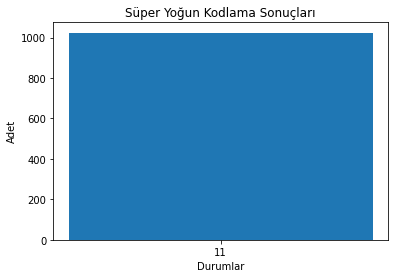

In [56]:
hist = dict()
for val in result.measurements["M"]:
    new_str = ""
    for s in val:
        new_str += str(s)
    try:
        hist[new_str] += 1
    except KeyError:
        hist[new_str] = 1
        
pyplot.bar(hist.keys(), hist.values())
pyplot.title("Süper Yoğun Kodlama Sonuçları")
pyplot.xlabel("Durumlar")
pyplot.ylabel("Adet")

# Mesajın doğruluğunu kontrol et.
st = ""
for i in message:
    st += str(i)
print("Doğru mu? {}".format(hist[st] > 1024 * 75 / 100))